In [2]:
import pandas as pd
import numpy as np

In [3]:
anuncios = pd.read_csv('https://raw.githubusercontent.com/afoone/caipc-laberit-oct2022/master/data/Advertising.csv')

In [6]:
anuncios.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
anuncios.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
anuncios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
import statsmodels.formula.api as smf

In [13]:
regresion = smf.ols(formula='Sales~TV', data=anuncios).fit()

In [15]:
regresion.params

Intercept    7.032594
TV           0.047537
dtype: float64

Sales = 7.032594 + 0.047537 * TV

In [18]:
sales_prediction = regresion.predict(anuncios['TV'])

In [22]:
sales_prediction


0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [23]:
import matplotlib.pyplot as plt

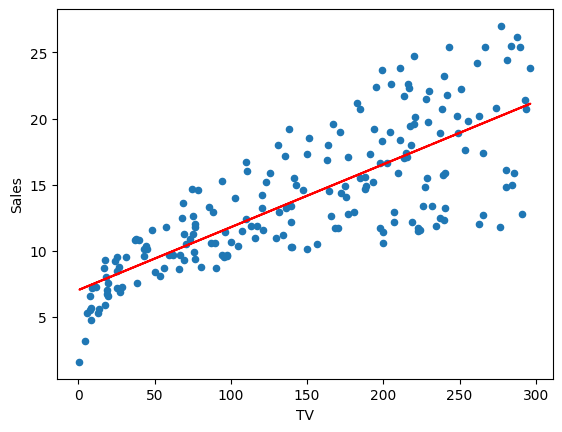

In [27]:
%matplotlib inline
anuncios.plot(kind = 'scatter', x = "TV", y="Sales")
plt.plot(anuncios[['TV']], sales_prediction, color = 'red')

In [29]:
regresion.rsquared

0.611875050850071

In [32]:
# está entre 0 y 1 y cuanto mayor, mejor es el resultado
regresion.rsquared_adj

0.6099148238341623

In [34]:
regresion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.47e-42
Time:                        16:47:57   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
anuncios['predicted'] = sales_prediction


In [37]:
anuncios.head()

,TV,Radio,Newspaper,Sales,predicted
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218


In [40]:
anuncios['rse']=(anuncios['Sales']- anuncios['predicted'])**2

In [42]:
anuncios

,TV,Radio,Newspaper,Sales,predicted,rse
0,230.1,37.8,69.2,22.1,17.970775,17.050503
1,44.5,39.3,45.1,10.4,9.147974,1.567569
2,17.2,45.9,69.3,9.3,7.850224,2.101851
3,151.5,41.3,58.5,18.5,14.234395,18.195390
4,180.8,10.8,58.4,12.9,15.627218,7.437719
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,8.848493,1.558735
196,94.2,4.9,8.1,9.7,11.510545,3.278073
197,177.0,9.3,6.4,12.8,15.446579,7.004380
198,283.6,42.0,66.2,25.5,20.513985,24.860348


In [47]:
anuncios['rse'].mean()**0.5 # rmse

3.2423221486546887

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <BarContainer object of 10 artists>)

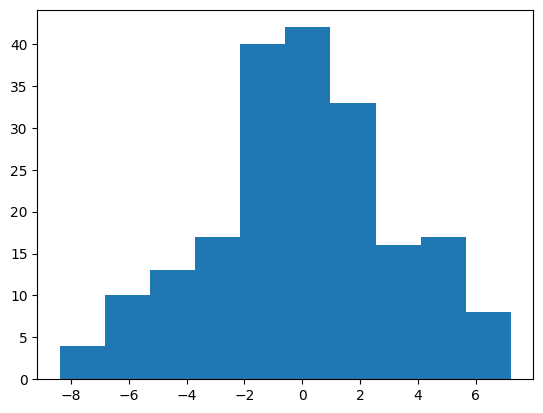

In [48]:
plt.hist(anuncios['Sales']- anuncios['predicted'])

# Regresión Múltiple

- Sales~TV
- Sales~Newspaper
- Sales~Radio
- Sales~TV+Newspaper
- Sales~TV+Radio
- Sales~Newspaper+Radio
- Sales~TV+Newspaper+Radio


In [50]:
regresion_tn = smf.ols(formula='Sales~TV+Newspaper', data=anuncios).fit()

In [52]:
regresion_tn.rsquared_adj

0.6422399150864777

In [53]:
regresion_tn.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [55]:
regresion_tn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           3.95e-45
Time:                        17:05:33   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
smf.ols(formula='Sales~TV+Radio', data=anuncios).fit().rsquared_adj

0.8961505479974428

In [58]:
smf.ols(formula='Sales~Newspaper+Radio', data=anuncios).fit().rsquared_adj

0.3259306172899197

In [61]:
smf.ols(formula='Sales~TV+Newspaper+Radio', data=anuncios).fit().rsquared_adj

0.8956373316204668

In [62]:
model = smf.ols(formula='Sales~TV+Radio', data=anuncios).fit()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           4.83e-98
Time:                        17:10:10   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multicolinealidad

In [68]:
anuncios.corr()

,TV,Radio,Newspaper,Sales,predicted,rse
TV,1.000000,0.054809,0.056648,0.782224,1.000000,0.490092
Radio,0.054809,1.000000,0.354104,0.576223,0.054809,0.079142
Newspaper,0.056648,0.354104,1.000000,0.228299,0.056648,0.056566
Sales,0.782224,0.576223,0.228299,1.000000,0.782224,0.341963
predicted,1.000000,0.054809,0.056648,0.782224,1.000000,0.490092
rse,0.490092,0.079142,0.056566,0.341963,0.490092,1.000000


# Linealidad

In [70]:
ventas = {
    'mes': [1,2,3,4,5,6,7,8,9],
    'ventas': [12.6, 17.1, 31, 63, 160, 415, 1110, 3000, 8120]
}

In [72]:
ventas_df = pd.DataFrame(ventas)

In [74]:
ventas_df

,mes,ventas
0,1,12.6
1,2,17.1
2,3,31.0
3,4,63.0
4,5,160.0
5,6,415.0
6,7,1110.0
7,8,3000.0
8,9,8120.0


<AxesSubplot: xlabel='mes', ylabel='ventas'>

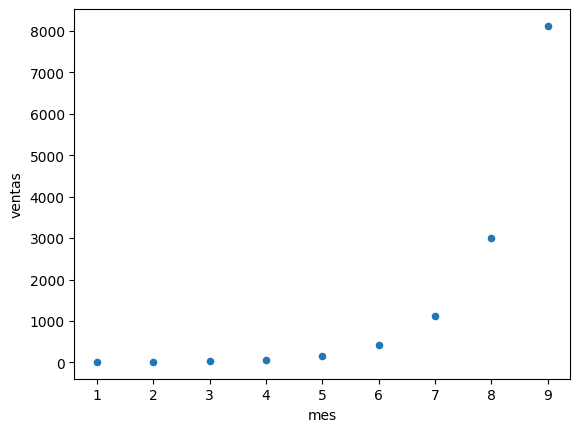

In [76]:
ventas_df.plot(kind='scatter', x="mes", y="ventas")

<AxesSubplot: xlabel='mes'>

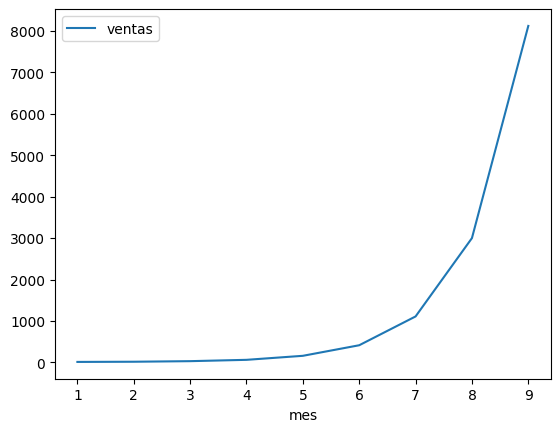

In [77]:
ventas_df.plot(kind='line', x="mes", y="ventas")

In [79]:
re_hockey = smf.ols(formula='ventas~mes', data=ventas_df).fit()

In [81]:
re_hockey.rsquared_adj

0.49193326133698767

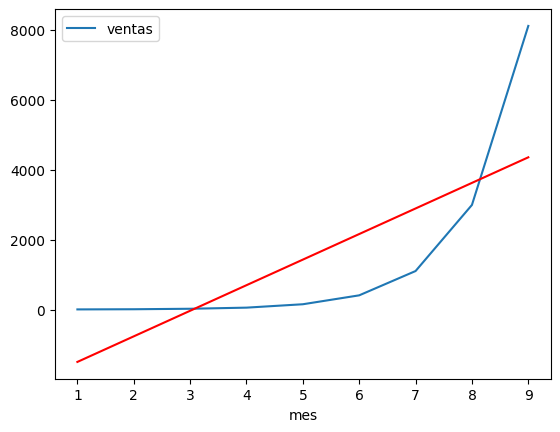

In [86]:
%matplotlib inline
ventas_df.plot(kind='line', x="mes", y="ventas")
plt.plot(ventas_df[['mes']], re_hockey.predict(ventas_df['mes']), color = 'red')

In [87]:
ventas_df['ventas_log'] = ventas_df['ventas'].apply(lambda x: np.log(x))

<AxesSubplot: xlabel='mes', ylabel='ventas_log'>

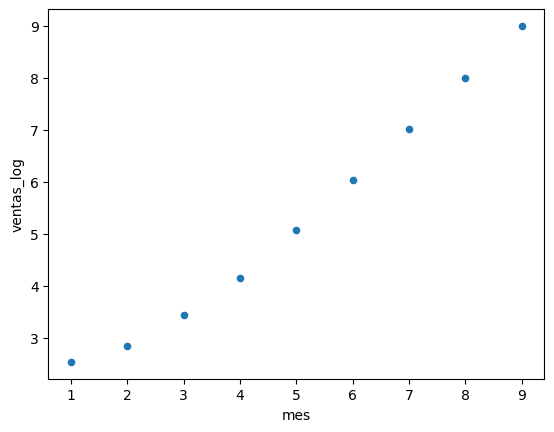

In [89]:
ventas_df.plot(kind='scatter', x='mes', y='ventas_log')

In [90]:
reg_log = smf.ols(formula='ventas_log~mes', data=ventas_df).fit()

In [92]:
reg_log.rsquared_adj

0.9816516982340702

# Scikitlearn

In [93]:
anuncios


,TV,Radio,Newspaper,Sales,predicted,rse
0,230.1,37.8,69.2,22.1,17.970775,17.050503
1,44.5,39.3,45.1,10.4,9.147974,1.567569
2,17.2,45.9,69.3,9.3,7.850224,2.101851
3,151.5,41.3,58.5,18.5,14.234395,18.195390
4,180.8,10.8,58.4,12.9,15.627218,7.437719
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,8.848493,1.558735
196,94.2,4.9,8.1,9.7,11.510545,3.278073
197,177.0,9.3,6.4,12.8,15.446579,7.004380
198,283.6,42.0,66.2,25.5,20.513985,24.860348


In [97]:
anuncios = anuncios.drop(['rse', 'predicted'], axis=1)

In [98]:
anuncios

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [101]:
X = anuncios[['TV','Radio', 'Newspaper']]
y = anuncios['Sales']

In [102]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [103]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [104]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [105]:
# estimador
estimador = SVR(kernel='linear')
selector = RFE(estimator=estimador, n_features_to_select=2, step=1)


In [106]:
selector.fit(X, y)

RFE(estimator=SVR(kernel='linear'), n_features_to_select=2)

In [107]:
selector.support_


array([ True,  True, False])

In [109]:
X # serán la primera y la segunda

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
lr = LinearRegression()

In [113]:
lr.fit(X[['TV', 'Radio']], y)

LinearRegression()

In [114]:
lr.intercept_

2.921099912405131

In [115]:
lr.coef_

array([0.04575482, 0.18799423])

In [116]:
lr.predict(X[['TV', 'Radio']])

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [119]:
lr.score(X[['TV', 'Radio']], y)

0.8971942610828957